In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
#marfalojik islemeler siyah beyaz goruntuler uzerinde 
#  goruntun yapisal ozellilerin degistirilmesine yarayan islemler butunudur 4 temel marfolojik islem vardir
# bunlar (erosion-asinma : ditation)

In [8]:
print(os.getcwd())

C:\Users\nicat


In [18]:
my_binary_img = cv2.imread("./paint.png",0)
print (my_binary_img.shape)

(648, 1152)


In [19]:
# morofoljik islemelri yerine getirmek icin bize lazim olan kernel matrisini olusturuypruz 
# bu matris . 5x5 boyutunda ve tamamen int tipinde 1 degerinden olusacaktir 
#tum alan (5x5 lik olan) 255 ve ya 1 degerinden olusuyorsa o zaman o seger sabit kalacak . aksi halde  
#o piksel siyah degerinin rengini alacaktir
#kerneli olsuturyoruz 
my_kernel = np.ones((5,5), dtype=np.uint8)

In [20]:
my_erosion_img = cv2.erode(my_binary_img, my_kernel, iterations=2)

Text(0.5, 1.0, 'erosion')

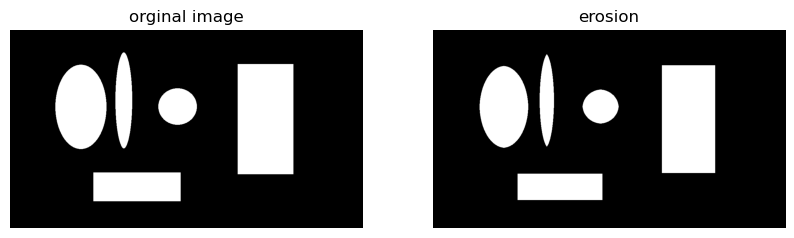

In [21]:
fig= plt.figure(figsize=(10,7))

plt.subplot (1,2,1)
plt.imshow(my_binary_img, cmap="gray")
plt.axis("off")
plt.title("orginal image")

plt.subplot (1,2,2)
plt.imshow(my_erosion_img, cmap="gray")
plt.axis("off")
plt.title("erosion")

In [22]:
my_dilation_image = cv2.dilate(my_binary_img , my_kernel , iterations= 6)

In [24]:
# dilation geniusleme erosionun asinma tam tersi islem yapar 
#goruntu uzerinde kaydirriken

my_dilation_img = cv2.dilate(my_binary_img, my_kernel, iterations=6)

Text(0.5, 1.0, 'dilate image')

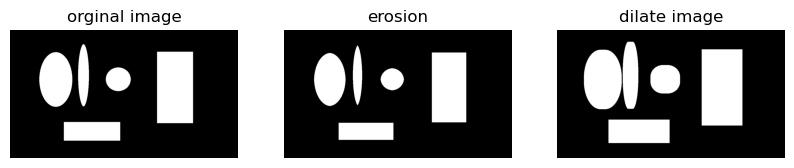

In [26]:
fig= plt.figure(figsize=(10,7))

plt.subplot (1,3,1)
plt.imshow(my_binary_img, cmap="gray")
plt.axis("off")
plt.title("orginal image")

plt.subplot (1,3,2)
plt.imshow(my_erosion_img, cmap="gray")
plt.axis("off")
plt.title("erosion")

plt.subplot (1,3,3)
plt.imshow(my_dilation_image, cmap="gray")
plt.axis("off")
plt.title("dilate image")

In [27]:
new_img = cv2.imread("./nicatpaint.png", 0)

In [28]:
new_img.shape

(648, 1152)

In [29]:
white_noise= np.random.randint(0,2,size=new_img.shape[:2])
white_noise *= 255

Text(0.5, 1.0, 'gurultu')

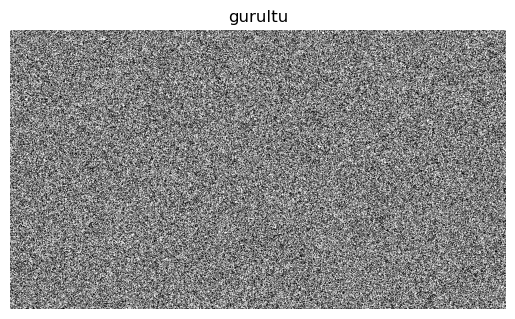

In [33]:
plt.imshow(new_img, cmap="gray")
plt.axis("off")
plt.title("gorijinal")

plt.imshow(white_noise, cmap="gray")
plt.axis("off")
plt.title("gurultu")

Text(0.5, 1.0, 'noisedimg')

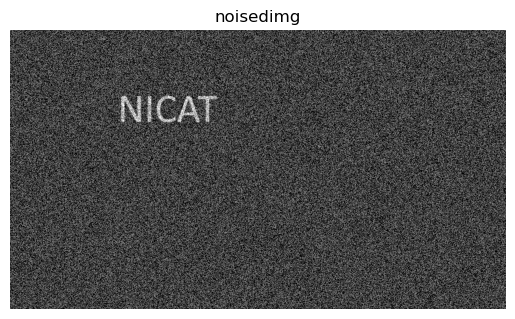

In [34]:
my_noised_img = white_noise + new_img
plt.imshow(my_noised_img, cmap="gray")
plt.axis("off")
plt.title("noisedimg")

In [35]:
#opening yeni acilma goruntuye once erosion sobrada dilaation islemenin arka arkaya uygular 
#once goruntude beyaz piksleler yok olur sonrada buyuk beyaz pikseller

my_opening_img = cv2.morphologyEx(my_noised_img.astype(np.float32), cv2.MORPH_OPEN, my_kernel)

Text(0.5, 1.0, 'opening image')

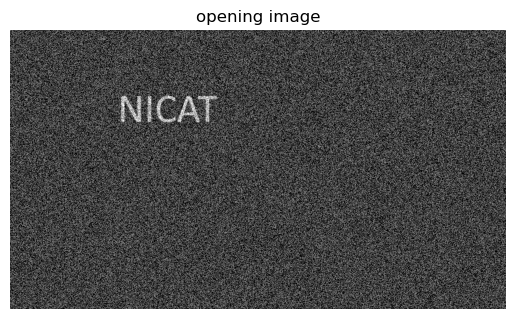

In [37]:

plt.imshow(my_opening_img, cmap="gray")
plt.axis("off")
plt.title("opening image")

Text(0.5, 1.0, 'opening')

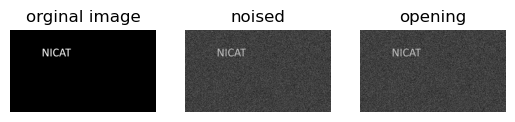

In [38]:
plt.subplot (1,3,1)
plt.imshow(new_img, cmap="gray")
plt.axis("off")
plt.title("orginal image")

plt.subplot (1,3,2)
plt.imshow(my_noised_img, cmap="gray")
plt.axis("off")
plt.title("noised")

plt.subplot (1,3,3)
plt.imshow(my_opening_img, cmap="gray")
plt.axis("off")
plt.title("opening")

In [39]:
#xlosing openin isleminin tam tersidir ozellikle siyah goruntulerde mat gorunumde oldikca ise yarar,
black_noise = np.random.randint(0,2, size = new_img.shape[0:2])
black_noise *= -255

In [41]:
my_black_img = black_noise + new_img


Text(0.5, 1.0, 'blacknoise')

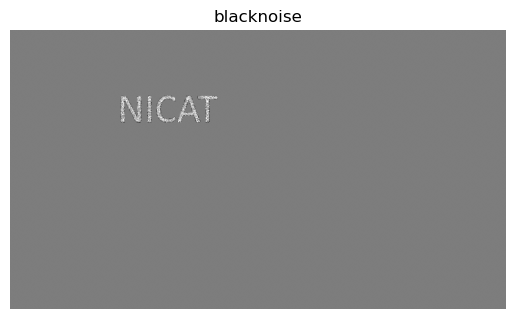

In [42]:
my_black_img[my_black_img <= -245] = 0
plt.imshow(my_black_img,cmap = "gray")
plt.axis("off")
plt.title("blacknoise")

In [43]:
my_closing_img = cv2.morphologyEx(my_black_img.astype(np.float32), cv2.MORPH_CLOSE, my_kernel)

Text(0.5, 1.0, 'closing')

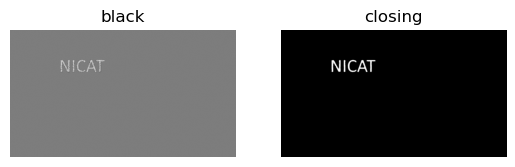

In [45]:
plt.subplot (1,2,1)
plt.imshow(my_black_img, cmap="gray")
plt.axis("off")
plt.title("black")

plt.subplot (1,2,2)
plt.imshow(my_closing_img, cmap="gray")
plt.axis("off")
plt.title("closing")

In [47]:
# grAdient tontemiyle keanr tespiti goruntu isleminde gradient bir pikselden diger piksele gecerken yasanan degisikligin yogunlugunu ifade eder 

my_gradient_1 = cv2.morphologyEx(my_binary_img , cv2.MORPH_GRADIENT , my_kernel)
my_gradient_2 = cv2.morphologyEx(new_img , cv2.MORPH_GRADIENT , my_kernel)

Text(0.5, 1.0, 'gradient2')

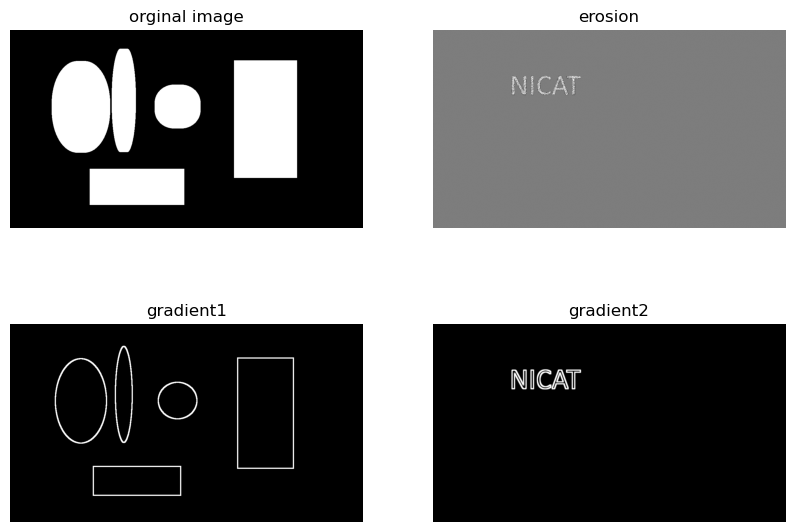

In [53]:
fig= plt.figure(figsize=(10,7))

plt.subplot (2,2,1)
plt.imshow(my_dilation_img, cmap="gray")
plt.axis("off")
plt.title("orginal image")

plt.subplot (2,2,2)
plt.imshow(my_black_img, cmap="gray")
plt.axis("off")
plt.title("erosion")


plt.subplot (2,2,3)
plt.imshow(my_gradient_1, cmap="gray")
plt.axis("off")
plt.title("gradient1")

plt.subplot (2,2,4)
plt.imshow(my_gradient_2, cmap="gray")
plt.axis("off")
plt.title("gradient2")